<a href="https://colab.research.google.com/github/OswaldoMoper/Mathematical_Data_Analysis/blob/master/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [567]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from datetime import datetime, date
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [568]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

##Data

In [569]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/ My \Drive/Diplomado/F1-1950-2023

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/ My Drive/Diplomado/F1-1950-2023


#General: Functions and defs

In [570]:
def minutes_to_miliseconds(time):
  time_dt = datetime.strptime(time, "%M:%S.%f")
  miliseconds = (time_dt.microsecond // 1000) + (time_dt.second * 1000) + (time_dt.minute * 60000)
  return miliseconds

#Función para dar formato al titulo
def format_title(title, subtitle=None, subtitle_font_size=14):
        title = f'<b>{title}</b>'
        if not subtitle:
            return title
        subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
        return f'{title}<br>{subtitle}'

In [571]:
Grid_type = CategoricalDtype(categories = [ '1' ,'2', '3', '4', '5', '6', '7' ,'8', '9', '10', '11' ,'12', '13', '14'
                                          , '15', '16', '17' ,'18', '19', '20', '21', '22', '23', '24', '25', '26' ], ordered = True )

#Grands prix

## Circuits

In [572]:
circuits = pd.read_csv('circuits.csv').drop( columns = [ 'url', 'circuitRef' ] ).rename( columns = { 'name': 'circuitName' } )
circuits

,circuitId,circuitName,location,country,lat,lng,alt
0,1,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,2,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,3,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,4,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,5,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130
...,...,...,...,...,...,...,...
72,75,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108
73,76,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255
74,77,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15
75,78,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N


In [573]:
races_ = pd.read_csv('races.csv').rename( columns = { 'name': 'GPName' } ).drop( columns = [ 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'time' , 'date'] )
races_

,raceId,year,round,circuitId,GPName
0,1,2009,1,1,Australian Grand Prix
1,2,2009,2,2,Malaysian Grand Prix
2,3,2009,3,17,Chinese Grand Prix
3,4,2009,4,3,Bahrain Grand Prix
4,5,2009,5,4,Spanish Grand Prix
...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix
1097,1117,2023,19,32,Mexico City Grand Prix
1098,1118,2023,20,18,São Paulo Grand Prix
1099,1119,2023,21,80,Las Vegas Grand Prix


In [574]:
races = races_.merge( circuits, on = [ 'circuitId' ], how = 'left' ).drop( columns = [ 'circuitName', 'location', 'country', 'round', 'GPName' ] )
races

,raceId,year,circuitId,lat,lng,alt
0,1,2009,1,-37.84970,144.96800,10
1,2,2009,2,2.76083,101.73800,18
2,3,2009,17,31.33890,121.22000,5
3,4,2009,3,26.03250,50.51060,7
4,5,2009,4,41.57000,2.26111,109
...,...,...,...,...,...,...
1096,1116,2023,69,30.13280,-97.64110,161
1097,1117,2023,32,19.40420,-99.09070,2227
1098,1118,2023,18,-23.70360,-46.69970,785
1099,1119,2023,80,36.11470,-115.17300,\N


## Qualy Results

In [575]:
qualifying = pd.read_csv('qualifying.csv').rename( columns = {'position': 'qualy_position' } ).drop( columns = [ 'number' ] )
qualifying

,qualifyId,raceId,driverId,constructorId,qualy_position,q1,q2,q3
0,1,18,1,1,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...
9810,9868,1110,848,3,16,2:00.314,\N,\N
9811,9869,1110,855,51,17,2:00.832,\N,\N
9812,9870,1110,858,3,18,2:01.535,\N,\N
9813,9871,1110,817,213,19,2:02.159,\N,\N


In [576]:
qualifying.loc[ qualifying[ 'q1' ] != '\\N', 'IsNA' ] = 'No'
qualifying

,qualifyId,raceId,driverId,constructorId,qualy_position,q1,q2,q3,IsNA
0,1,18,1,1,1,1:26.572,1:25.187,1:26.714,No
1,2,18,9,2,2,1:26.103,1:25.315,1:26.869,No
2,3,18,5,1,3,1:25.664,1:25.452,1:27.079,No
3,4,18,13,6,4,1:25.994,1:25.691,1:27.178,No
4,5,18,2,2,5,1:25.960,1:25.518,1:27.236,No
...,...,...,...,...,...,...,...,...,...
9810,9868,1110,848,3,16,2:00.314,\N,\N,No
9811,9869,1110,855,51,17,2:00.832,\N,\N,No
9812,9870,1110,858,3,18,2:01.535,\N,\N,No
9813,9871,1110,817,213,19,2:02.159,\N,\N,No


In [577]:
qualifying[ 'q2' ] = qualifying[ 'q2' ].fillna( qualifying[ 'q1' ] )
qualifying.loc[ qualifying[ 'q2' ] == '\\N', 'q2' ] = qualifying[ 'q1' ]
qualifying.isna().sum()

qualifyId           0
raceId              0
driverId            0
constructorId       0
qualy_position      0
q1                  8
q2                  8
q3                327
IsNA              141
dtype: int64

In [578]:
qualifying[ 'q3' ] = qualifying[ 'q3' ].fillna( qualifying[ 'q2' ] )
qualifying.loc[ qualifying[ 'q3' ] == '\\N', 'q3' ] = qualifying[ 'q2' ]
qualifying.isna().sum()

qualifyId           0
raceId              0
driverId            0
constructorId       0
qualy_position      0
q1                  8
q2                  8
q3                  8
IsNA              141
dtype: int64

In [579]:
qualifying = qualifying.dropna().drop( columns = [ 'IsNA' ] )
qualifying

,qualifyId,raceId,driverId,constructorId,qualy_position,q1,q2,q3
0,1,18,1,1,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...
9810,9868,1110,848,3,16,2:00.314,2:00.314,2:00.314
9811,9869,1110,855,51,17,2:00.832,2:00.832,2:00.832
9812,9870,1110,858,3,18,2:01.535,2:01.535,2:01.535
9813,9871,1110,817,213,19,2:02.159,2:02.159,2:02.159


In [580]:
qualifying.q1 = qualifying.q1.apply( minutes_to_miliseconds )
qualifying.q2 = qualifying.q2.apply( minutes_to_miliseconds )
qualifying.q3 = qualifying.q3.apply( minutes_to_miliseconds )
qualifying

,qualifyId,raceId,driverId,constructorId,qualy_position,q1,q2,q3
0,1,18,1,1,1,86572,85187,86714
1,2,18,9,2,2,86103,85315,86869
2,3,18,5,1,3,85664,85452,87079
3,4,18,13,6,4,85994,85691,87178
4,5,18,2,2,5,85960,85518,87236
...,...,...,...,...,...,...,...,...
9810,9868,1110,848,3,16,120314,120314,120314
9811,9869,1110,855,51,17,120832,120832,120832
9812,9870,1110,858,3,18,121535,121535,121535
9813,9871,1110,817,213,19,122159,122159,122159


In [581]:
# qualifying[ 'qualy_times' ] = list(zip(qualifying[ 'q1' ], qualifying[ 'q2' ], qualifying[ 'q3' ]))
# qualifying = qualifying.drop( columns = [ 'q1', 'q2', 'q3' ] ).reset_index( drop = True )
# qualifying

In [582]:
qualy_results = qualifying.merge( races, on = [ 'raceId' ], how = 'left' ).drop( columns = [ 'qualifyId' ] )
qualy_results

,raceId,driverId,constructorId,qualy_position,q1,q2,q3,year,circuitId,lat,lng,alt
0,18,1,1,1,86572,85187,86714,2008,1,-37.8497,144.96800,10
1,18,9,2,2,86103,85315,86869,2008,1,-37.8497,144.96800,10
2,18,5,1,3,85664,85452,87079,2008,1,-37.8497,144.96800,10
3,18,13,6,4,85994,85691,87178,2008,1,-37.8497,144.96800,10
4,18,2,2,5,85960,85518,87236,2008,1,-37.8497,144.96800,10
...,...,...,...,...,...,...,...,...,...,...,...,...
9661,1110,848,3,16,120314,120314,120314,2023,13,50.4372,5.97139,401
9662,1110,855,51,17,120832,120832,120832,2023,13,50.4372,5.97139,401
9663,1110,858,3,18,121535,121535,121535,2023,13,50.4372,5.97139,401
9664,1110,817,213,19,122159,122159,122159,2023,13,50.4372,5.97139,401


##Constructors

In [583]:
constructor = pd.read_csv('constructors.csv').drop( columns = [ 'url', 'constructorRef', 'nationality' ] ).rename( columns = { 'name': 'constructorName' } )
constructor.constructorName.sort_values().unique()

array(['AFM', 'AGS', 'ATS', 'Adams', 'Alfa Romeo', 'AlphaTauri',
       'Alpine F1 Team', 'Alta', 'Amon', 'Andrea Moda', 'Apollon',
       'Arrows', 'Arzani-Volpini', 'Aston Butterworth', 'Aston Martin',
       'BAR', 'BMW', 'BMW Sauber', 'BRM', 'BRM-Ford', 'BRP',
       'Behra-Porsche', 'Bellasi', 'Benetton', 'Boro', 'Brabham',
       'Brabham-Alfa Romeo', 'Brabham-BRM', 'Brabham-Climax',
       'Brabham-Ford', 'Brabham-Repco', 'Brawn', 'Bromme', 'Bugatti',
       'Caterham', 'Christensen', 'Cisitalia', 'Coloni', 'Connaught',
       'Connew', 'Cooper', 'Cooper-ATS', 'Cooper-Alfa Romeo',
       'Cooper-BRM', 'Cooper-Borgward', 'Cooper-Castellotti',
       'Cooper-Climax', 'Cooper-Ferrari', 'Cooper-Ford',
       'Cooper-Maserati', 'Cooper-OSCA', 'Dallara', 'De Tomaso',
       'De Tomaso-Alfa Romeo', 'De Tomaso-Ferrari', 'De Tomaso-Osca',
       'Deidt', 'Del Roy', 'Derrington', 'Dunn', 'EMW', 'ENB', 'ERA',
       'Eagle', 'Eagle-Climax', 'Eagle-Weslake', 'Elder', 'Embassy Hill',
       

In [584]:
qualy_results = qualy_results.merge( constructor, on = [ 'constructorId' ], how = 'left' ).drop( columns = [ 'constructorId' ] )
qualy_results

,raceId,driverId,qualy_position,q1,q2,q3,year,circuitId,lat,lng,alt,constructorName
0,18,1,1,86572,85187,86714,2008,1,-37.8497,144.96800,10,McLaren
1,18,9,2,86103,85315,86869,2008,1,-37.8497,144.96800,10,BMW Sauber
2,18,5,3,85664,85452,87079,2008,1,-37.8497,144.96800,10,McLaren
3,18,13,4,85994,85691,87178,2008,1,-37.8497,144.96800,10,Ferrari
4,18,2,5,85960,85518,87236,2008,1,-37.8497,144.96800,10,BMW Sauber
...,...,...,...,...,...,...,...,...,...,...,...,...
9661,1110,848,16,120314,120314,120314,2023,13,50.4372,5.97139,401,Williams
9662,1110,855,17,120832,120832,120832,2023,13,50.4372,5.97139,401,Alfa Romeo
9663,1110,858,18,121535,121535,121535,2023,13,50.4372,5.97139,401,Williams
9664,1110,817,19,122159,122159,122159,2023,13,50.4372,5.97139,401,AlphaTauri


In [585]:
constructors = pd.DataFrame( ["Red Bull Racing"
                             , "Mercedes-AMG Petronas F1 Team"
                             , "Scuderia Ferrari"
                             , "Mclaren F1 Team"
                             , "Aston Martin F1 Team"
                             , "Alpine F1 Team"
                             , "Williams Racing"
                             , "Visa Cash App RB"
                             , "Stake F1 Team Kick Sauber"
                             , "Haas F1 Team" ] ).rename( columns = { 0: 'constructorName' } )
constructors.index = constructors.index + 1
constructors.reset_index().rename( columns = { 'index': 'constructorPosition' } )

,constructorPosition,constructorName
0,1,Red Bull Racing
1,2,Mercedes-AMG Petronas F1 Team
2,3,Scuderia Ferrari
3,4,Mclaren F1 Team
4,5,Aston Martin F1 Team
5,6,Alpine F1 Team
6,7,Williams Racing
7,8,Visa Cash App RB
8,9,Stake F1 Team Kick Sauber
9,10,Haas F1 Team


###Red Bull Racing

In [586]:
rbr = [ "Red Bull", "Stewart", "Jaguar" ]
qualy_results.loc[ qualy_results[ 'constructorName' ].isin( rbr ), 'constructorPosition' ] = 1

###Mercedes-AMG Petronas F1 Team

In [587]:
qualy_results.loc[ qualy_results[ 'constructorName' ] == 'Mercedes', 'constructorPosition' ] = 2

###Scuderia Ferrari

In [588]:
qualy_results.loc[ qualy_results[ 'constructorName' ] == 'Ferrari', 'constructorPosition' ] = 3

###Mclaren Formula 1 Team

In [589]:
mcl = [ 'McLaren', 'McLaren-Alfa Romeo', 'McLaren-BRM', 'McLaren-Ford', 'McLaren-Serenissima' ]
qualy_results.loc[ qualy_results[ 'constructorName' ].isin( mcl ), 'constructorPosition' ] = 4

###Aston Martin F1 Team

In [590]:
amr = [ 'Aston Martin', 'Racing Point', 'Force India', 'Spyker', 'Spyker MF1' ]
qualy_results.loc[ qualy_results[ 'constructorName' ].isin( amr ), 'constructorPosition' ] = 5

###Alpine F1 Team

In [591]:
af = [ 'Alpine F1 Team', 'Renault' ]
qualy_results.loc[ qualy_results[ 'constructorName' ].isin( af ), 'constructorPosition' ] = 6

###Williams Racing

In [592]:
qualy_results.loc[ qualy_results[ 'constructorName' ] == 'Williams', 'constructorPosition' ] = 7

###Visa Cash App RB

In [593]:
vcarb = [ 'AlphaTauri', 'Toro Rosso', 'Minardi' ]
qualy_results.loc[ qualy_results[ 'constructorName' ].isin( vcarb ), 'constructorPosition' ] = 8

###Stake F1 Team Kick Sauber

In [594]:
sauber = [ 'Sauber', 'BMW Sauber', 'Alfa Romeo' ]
qualy_results.loc[ qualy_results[ 'constructorName' ].isin( sauber ), 'constructorPosition' ] = 9

###Haas F1 Team

In [595]:
qualy_results.loc[ qualy_results[ 'constructorName' ] == 'Haas F1 Team', 'constructorPosition' ] = 10

###General Constructors Table

In [596]:
qualy_results = qualy_results.drop( columns = [ 'constructorName' ] ).dropna().reset_index( drop = True )
qualy_results

,raceId,driverId,qualy_position,q1,q2,q3,year,circuitId,lat,lng,alt,constructorPosition
0,18,1,1,86572,85187,86714,2008,1,-37.8497,144.96800,10,4.0
1,18,9,2,86103,85315,86869,2008,1,-37.8497,144.96800,10,9.0
2,18,5,3,85664,85452,87079,2008,1,-37.8497,144.96800,10,4.0
3,18,13,4,85994,85691,87178,2008,1,-37.8497,144.96800,10,3.0
4,18,2,5,85960,85518,87236,2008,1,-37.8497,144.96800,10,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7460,1110,848,16,120314,120314,120314,2023,13,50.4372,5.97139,401,7.0
7461,1110,855,17,120832,120832,120832,2023,13,50.4372,5.97139,401,9.0
7462,1110,858,18,121535,121535,121535,2023,13,50.4372,5.97139,401,7.0
7463,1110,817,19,122159,122159,122159,2023,13,50.4372,5.97139,401,8.0


In [597]:
qualy_results.constructorPosition = qualy_results.constructorPosition.astype(int)
qualy_results

,raceId,driverId,qualy_position,q1,q2,q3,year,circuitId,lat,lng,alt,constructorPosition
0,18,1,1,86572,85187,86714,2008,1,-37.8497,144.96800,10,4
1,18,9,2,86103,85315,86869,2008,1,-37.8497,144.96800,10,9
2,18,5,3,85664,85452,87079,2008,1,-37.8497,144.96800,10,4
3,18,13,4,85994,85691,87178,2008,1,-37.8497,144.96800,10,3
4,18,2,5,85960,85518,87236,2008,1,-37.8497,144.96800,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...
7460,1110,848,16,120314,120314,120314,2023,13,50.4372,5.97139,401,7
7461,1110,855,17,120832,120832,120832,2023,13,50.4372,5.97139,401,9
7462,1110,858,18,121535,121535,121535,2023,13,50.4372,5.97139,401,7
7463,1110,817,19,122159,122159,122159,2023,13,50.4372,5.97139,401,8


## Race Lap Times

In [598]:
lap_times = pd.read_csv('lap_times.csv').drop( columns = [ 'time' ] ).rename( columns = { 'milliseconds': 'lap_time', 'position' : 'lap_position' } )
lap_times

,raceId,driverId,lap,lap_position,lap_time
0,841,20,1,1,98109
1,841,20,2,1,93006
2,841,20,3,1,92713
3,841,20,4,1,92803
4,841,20,5,1,92342
...,...,...,...,...,...
551737,1110,817,40,17,114361
551738,1110,817,41,17,113367
551739,1110,817,42,16,115247
551740,1110,817,43,16,112115


In [599]:
Race_times = lap_times.merge( qualy_results, on = [ 'raceId', 'driverId' ], how = 'left' )
Race_times

,raceId,driverId,lap,lap_position,lap_time,qualy_position,q1,q2,q3,year,circuitId,lat,lng,alt,constructorPosition
0,841,20,1,1,98109,1.0,85296.0,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0
1,841,20,2,1,93006,1.0,85296.0,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0
2,841,20,3,1,92713,1.0,85296.0,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0
3,841,20,4,1,92803,1.0,85296.0,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0
4,841,20,5,1,92342,1.0,85296.0,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551737,1110,817,40,17,114361,19.0,122159.0,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0
551738,1110,817,41,17,113367,19.0,122159.0,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0
551739,1110,817,42,16,115247,19.0,122159.0,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0
551740,1110,817,43,16,112115,19.0,122159.0,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0


##Results

In [600]:
results_withna = pd.read_csv('results.csv').drop( columns = [ 'resultId', 'positionText', 'position', 'rank', 'fastestLap', 'number', 'constructorId', 'fastestLapTime', 'fastestLapSpeed', 'time' ]).rename( columns = { 'positionOrder': 'finalPosition' } )
results_withna

,raceId,driverId,grid,finalPosition,points,laps,milliseconds,statusId
0,18,1,1,1,10.0,58,5690616,1
1,18,2,5,2,8.0,58,5696094,1
2,18,3,7,3,6.0,58,5698779,1
3,18,4,11,4,5.0,58,5707797,1
4,18,5,3,5,4.0,58,5708630,1
...,...,...,...,...,...,...,...,...
26075,1110,817,19,16,0.0,44,5053521,1
26076,1110,858,18,17,0.0,44,5054926,1
26077,1110,807,0,18,0.0,44,5060900,1
26078,1110,832,4,19,0.0,23,\N,130


In [601]:
results_withna.loc[results_withna['milliseconds'] != '\\N', 'IsNA'] = 'No'
results_ = results_withna.dropna()
results_

,raceId,driverId,grid,finalPosition,points,laps,milliseconds,statusId,IsNA
0,18,1,1,1,10.0,58,5690616,1,No
1,18,2,5,2,8.0,58,5696094,1,No
2,18,3,7,3,6.0,58,5698779,1,No
3,18,4,11,4,5.0,58,5707797,1,No
4,18,5,3,5,4.0,58,5708630,1,No
...,...,...,...,...,...,...,...,...,...
26073,1110,848,15,14,0.0,44,5046634,1,No
26074,1110,825,16,15,0.0,44,5052204,1,No
26075,1110,817,19,16,0.0,44,5053521,1,No
26076,1110,858,18,17,0.0,44,5054926,1,No


In [602]:
results = results_.merge( Race_times, on = [ 'raceId', 'driverId' ], how = 'right' ).drop( columns = [ 'IsNA', 'grid', 'points' ] ).rename( columns = { 'milliseconds':'raceTime' } )
results

,raceId,driverId,finalPosition,laps,raceTime,statusId,lap,lap_position,lap_time,qualy_position,q1,q2,q3,year,circuitId,lat,lng,alt,constructorPosition
0,841,20,1.0,58.0,5370259,1.0,1,1,98109,1.0,85296.0,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0
1,841,20,1.0,58.0,5370259,1.0,2,1,93006,1.0,85296.0,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0
2,841,20,1.0,58.0,5370259,1.0,3,1,92713,1.0,85296.0,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0
3,841,20,1.0,58.0,5370259,1.0,4,1,92803,1.0,85296.0,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0
4,841,20,1.0,58.0,5370259,1.0,5,1,92342,1.0,85296.0,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551737,1110,817,16.0,44.0,5053521,1.0,40,17,114361,19.0,122159.0,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0
551738,1110,817,16.0,44.0,5053521,1.0,41,17,113367,19.0,122159.0,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0
551739,1110,817,16.0,44.0,5053521,1.0,42,16,115247,19.0,122159.0,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0
551740,1110,817,16.0,44.0,5053521,1.0,43,16,112115,19.0,122159.0,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0


##Drivers

In [603]:
drivers_ = pd.read_csv('drivers.csv').drop( columns = [ 'url', 'driverRef', 'number', 'code', 'dob' ] )
drivers_[ 'Full_Name' ] = drivers_[ 'forename' ] + ' ' + drivers_[ 'surname' ]
drivers_ = drivers_.drop( columns = [ 'forename', 'surname' ] )
drivers_

,driverId,nationality,Full_Name
0,1,British,Lewis Hamilton
1,2,German,Nick Heidfeld
2,3,German,Nico Rosberg
3,4,Spanish,Fernando Alonso
4,5,Finnish,Heikki Kovalainen
...,...,...,...
852,854,German,Mick Schumacher
853,855,Chinese,Guanyu Zhou
854,856,Dutch,Nyck de Vries
855,857,Australian,Oscar Piastri


In [604]:
nationalities = []
for nationality in drivers_[ 'nationality' ]:
  nationalities.append( nationality )
nationalities = list(set(nationalities))
nationalities.sort()
nationalities = pd.DataFrame( nationalities ).rename( columns = { 0: 'nationality' } )
nationalities.index = nationalities.index + 1
nationalities = nationalities.reset_index().rename( columns = { 'index': 'nationalityId' } )
nationalities

,nationalityId,nationality
0,1,American
1,2,American-Italian
2,3,Argentine
3,4,Argentine-Italian
4,5,Australian
5,6,Austrian
6,7,Belgian
7,8,Brazilian
8,9,British
9,10,Canadian


In [605]:
drivers = drivers_.merge( nationalities, on = 'nationality', how = 'left' ).drop( columns = [ 'nationality' ] )
drivers

,driverId,Full_Name,nationalityId
0,1,Lewis Hamilton,9
1,2,Nick Heidfeld,20
2,3,Nico Rosberg,20
3,4,Fernando Alonso,37
4,5,Heikki Kovalainen,18
...,...,...,...
852,854,Mick Schumacher,20
853,855,Guanyu Zhou,12
854,856,Nyck de Vries,16
855,857,Oscar Piastri,5


In [606]:
drivers_results = results.merge( drivers, on = [ 'driverId' ], how = 'left' )
drivers_results

,raceId,driverId,finalPosition,laps,raceTime,statusId,lap,lap_position,lap_time,qualy_position,...,q2,q3,year,circuitId,lat,lng,alt,constructorPosition,Full_Name,nationalityId
0,841,20,1.0,58.0,5370259,1.0,1,1,98109,1.0,...,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0,Sebastian Vettel,20
1,841,20,1.0,58.0,5370259,1.0,2,1,93006,1.0,...,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0,Sebastian Vettel,20
2,841,20,1.0,58.0,5370259,1.0,3,1,92713,1.0,...,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0,Sebastian Vettel,20
3,841,20,1.0,58.0,5370259,1.0,4,1,92803,1.0,...,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0,Sebastian Vettel,20
4,841,20,1.0,58.0,5370259,1.0,5,1,92342,1.0,...,84090.0,83529.0,2011.0,1.0,-37.8497,144.96800,10,1.0,Sebastian Vettel,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551737,1110,817,16.0,44.0,5053521,1.0,40,17,114361,19.0,...,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0,Daniel Ricciardo,5
551738,1110,817,16.0,44.0,5053521,1.0,41,17,113367,19.0,...,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0,Daniel Ricciardo,5
551739,1110,817,16.0,44.0,5053521,1.0,42,16,115247,19.0,...,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0,Daniel Ricciardo,5
551740,1110,817,16.0,44.0,5053521,1.0,43,16,112115,19.0,...,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0,Daniel Ricciardo,5


In [607]:
drivers = drivers_results.drop( columns = [ 'raceId', 'finalPosition', 'raceTime', 'laps', 'statusId', 'lap', 'lap_position', 'qualy_position', 'lap_time'
                                          , 'q1', 'q2', 'q3', 'year', 'circuitId', 'lat', 'lng', 'alt' ] )
drivers

,driverId,constructorPosition,Full_Name,nationalityId
0,20,1.0,Sebastian Vettel,20
1,20,1.0,Sebastian Vettel,20
2,20,1.0,Sebastian Vettel,20
3,20,1.0,Sebastian Vettel,20
4,20,1.0,Sebastian Vettel,20
...,...,...,...,...
551737,817,8.0,Daniel Ricciardo,5
551738,817,8.0,Daniel Ricciardo,5
551739,817,8.0,Daniel Ricciardo,5
551740,817,8.0,Daniel Ricciardo,5


## Grands Prix (actual drivers)

In [608]:
a_drivers = [ "Max Verstappen", "Sergio Pérez", "Lewis Hamilton", "Fernando Alonso"
            , "Charles Leclerc", "Lando Norris", "Carlos Sainz", "George Russell"
            , "Oscar Piastri", "Lance Stroll", "Pierre Gasly", "Esteban Ocon"
            , "Alexander Albon", "Yuki Tsunoda", "Valtteri Bottas", "Nico Hülkenberg"
            , "Daniel Ricciardo", "Guanyu Zhou", "Kevin Magnussen", "Logan Sargeant"  ]
actuall_drivers = drivers_results[ drivers_results[ 'Full_Name' ].isin( a_drivers ) ].reset_index( drop = True )
actuall_drivers

,raceId,driverId,finalPosition,laps,raceTime,statusId,lap,lap_position,lap_time,qualy_position,...,q2,q3,year,circuitId,lat,lng,alt,constructorPosition,Full_Name,nationalityId
0,841,1,2.0,58.0,5392556,1.0,1,2,100573,2.0,...,84595.0,84307.0,2011.0,1.0,-37.8497,144.96800,10,4.0,Lewis Hamilton,9
1,841,1,2.0,58.0,5392556,1.0,2,2,93774,2.0,...,84595.0,84307.0,2011.0,1.0,-37.8497,144.96800,10,4.0,Lewis Hamilton,9
2,841,1,2.0,58.0,5392556,1.0,3,2,92900,2.0,...,84595.0,84307.0,2011.0,1.0,-37.8497,144.96800,10,4.0,Lewis Hamilton,9
3,841,1,2.0,58.0,5392556,1.0,4,2,92582,2.0,...,84595.0,84307.0,2011.0,1.0,-37.8497,144.96800,10,4.0,Lewis Hamilton,9
4,841,1,2.0,58.0,5392556,1.0,5,2,92471,2.0,...,84595.0,84307.0,2011.0,1.0,-37.8497,144.96800,10,4.0,Lewis Hamilton,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160201,1110,817,16.0,44.0,5053521,1.0,40,17,114361,19.0,...,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0,Daniel Ricciardo,5
160202,1110,817,16.0,44.0,5053521,1.0,41,17,113367,19.0,...,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0,Daniel Ricciardo,5
160203,1110,817,16.0,44.0,5053521,1.0,42,16,115247,19.0,...,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0,Daniel Ricciardo,5
160204,1110,817,16.0,44.0,5053521,1.0,43,16,112115,19.0,...,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0,Daniel Ricciardo,5


In [609]:
GrandPrix = actuall_drivers.drop( columns = [ 'Full_Name', 'raceId' ] )
GrandPrix.replace('\\N', np.nan, inplace=True)
GrandPrix = GrandPrix.dropna()
GrandPrix

,driverId,finalPosition,laps,raceTime,statusId,lap,lap_position,lap_time,qualy_position,q1,q2,q3,year,circuitId,lat,lng,alt,constructorPosition,nationalityId
0,1,2.0,58.0,5392556,1.0,1,2,100573,2.0,85384.0,84595.0,84307.0,2011.0,1.0,-37.8497,144.96800,10,4.0,9
1,1,2.0,58.0,5392556,1.0,2,2,93774,2.0,85384.0,84595.0,84307.0,2011.0,1.0,-37.8497,144.96800,10,4.0,9
2,1,2.0,58.0,5392556,1.0,3,2,92900,2.0,85384.0,84595.0,84307.0,2011.0,1.0,-37.8497,144.96800,10,4.0,9
3,1,2.0,58.0,5392556,1.0,4,2,92582,2.0,85384.0,84595.0,84307.0,2011.0,1.0,-37.8497,144.96800,10,4.0,9
4,1,2.0,58.0,5392556,1.0,5,2,92471,2.0,85384.0,84595.0,84307.0,2011.0,1.0,-37.8497,144.96800,10,4.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160201,817,16.0,44.0,5053521,1.0,40,17,114361,19.0,122159.0,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0,5
160202,817,16.0,44.0,5053521,1.0,41,17,113367,19.0,122159.0,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0,5
160203,817,16.0,44.0,5053521,1.0,42,16,115247,19.0,122159.0,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0,5
160204,817,16.0,44.0,5053521,1.0,43,16,112115,19.0,122159.0,122159.0,122159.0,2023.0,13.0,50.4372,5.97139,401,8.0,5


#Exploratory Analysis

In [610]:
GrandPrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102453 entries, 0 to 160205
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   driverId             102453 non-null  int64  
 1   finalPosition        102453 non-null  float64
 2   laps                 102453 non-null  float64
 3   raceTime             102453 non-null  object 
 4   statusId             102453 non-null  float64
 5   lap                  102453 non-null  int64  
 6   lap_position         102453 non-null  int64  
 7   lap_time             102453 non-null  int64  
 8   qualy_position       102453 non-null  float64
 9   q1                   102453 non-null  float64
 10  q2                   102453 non-null  float64
 11  q3                   102453 non-null  float64
 12  year                 102453 non-null  float64
 13  circuitId            102453 non-null  float64
 14  lat                  102453 non-null  float64
 15  lng                  1

In [611]:
GrandPrix.finalPosition = GrandPrix.finalPosition.astype(int)
GrandPrix.laps = GrandPrix.laps.astype(int)
GrandPrix.statusId = GrandPrix.statusId.astype(int)
GrandPrix.qualy_position = GrandPrix.qualy_position.astype(int)
GrandPrix.q3 = GrandPrix.q3.astype(int)
GrandPrix.circuitId = GrandPrix.circuitId.astype(int)
GrandPrix.constructorPosition = GrandPrix.constructorPosition.astype(int)
GrandPrix.year = GrandPrix.year.astype(int)
GrandPrix

,driverId,finalPosition,laps,raceTime,statusId,lap,lap_position,lap_time,qualy_position,q1,q2,q3,year,circuitId,lat,lng,alt,constructorPosition,nationalityId
0,1,2,58,5392556,1,1,2,100573,2,85384.0,84595.0,84307,2011,1,-37.8497,144.96800,10,4,9
1,1,2,58,5392556,1,2,2,93774,2,85384.0,84595.0,84307,2011,1,-37.8497,144.96800,10,4,9
2,1,2,58,5392556,1,3,2,92900,2,85384.0,84595.0,84307,2011,1,-37.8497,144.96800,10,4,9
3,1,2,58,5392556,1,4,2,92582,2,85384.0,84595.0,84307,2011,1,-37.8497,144.96800,10,4,9
4,1,2,58,5392556,1,5,2,92471,2,85384.0,84595.0,84307,2011,1,-37.8497,144.96800,10,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160201,817,16,44,5053521,1,40,17,114361,19,122159.0,122159.0,122159,2023,13,50.4372,5.97139,401,8,5
160202,817,16,44,5053521,1,41,17,113367,19,122159.0,122159.0,122159,2023,13,50.4372,5.97139,401,8,5
160203,817,16,44,5053521,1,42,16,115247,19,122159.0,122159.0,122159,2023,13,50.4372,5.97139,401,8,5
160204,817,16,44,5053521,1,43,16,112115,19,122159.0,122159.0,122159,2023,13,50.4372,5.97139,401,8,5


##Podios y Victorias

In [612]:
All_d_R =  results_withna[ results_withna[ 'finalPosition' ].isin([ 1, 2, 3 ]) ].reset_index( drop = True ).drop( columns = [ 'IsNA' ] )
All_d_R

,raceId,driverId,grid,finalPosition,points,laps,milliseconds,statusId
0,18,1,1,1,10.0,58,5690616,1
1,18,2,5,2,8.0,58,5696094,1
2,18,3,7,3,6.0,58,5698779,1
3,19,8,2,1,10.0,56,5478555,1
4,19,9,4,2,8.0,56,5498125,1
...,...,...,...,...,...,...,...,...
3290,1109,846,3,2,18.0,70,5922365,1
3291,1109,815,9,3,15.0,70,5926237,1
3292,1110,830,6,1,25.0,44,4950450,1
3293,1110,815,2,2,18.0,44,4972755,1


In [613]:
All_d_FP = pd.DataFrame( All_d_R.groupby( [ 'driverId' ] ).finalPosition.value_counts() ).rename( columns = { 'finalPosition': 'count' } ).reset_index()
All_d_FP.finalPosition = All_d_FP.finalPosition.astype(str)
All_d_FP

,driverId,finalPosition,count
0,1,1,103
1,1,2,55
2,1,3,37
3,2,2,8
4,2,3,5
...,...,...,...
431,846,2,3
432,847,3,7
433,847,2,2
434,847,1,1


In [614]:
All_dn_FP = All_d_FP.merge( drivers_, on = [ 'driverId' ], how = 'left' ).drop( columns = [ 'driverId' ] )
All_dn_FP.sort_values( by = [ 'count' ], inplace = True, ascending = False )
All_dn_FP = All_dn_FP.reset_index( drop = True )
All_dn_FP

,finalPosition,count,nationality,Full_Name
0,1,103,British,Lewis Hamilton
1,1,91,German,Michael Schumacher
2,2,55,British,Lewis Hamilton
3,1,53,German,Sebastian Vettel
4,1,51,French,Alain Prost
...,...,...,...,...
431,3,1,German,Rolf Stommelen
432,2,1,American,Harry Schell
433,3,1,American,Harry Schell
434,1,1,Brazilian,Carlos Pace


In [615]:
All_dn_FP_top = All_dn_FP.sort_values( by = [ 'finalPosition', 'count' ], ascending = [True, False] ).head(10)
All_dn_FP_top
Most_V_d = All_dn_FP_top.Full_Name.to_list()
Most_V_d

['Lewis Hamilton',
 'Michael Schumacher',
 'Sebastian Vettel',
 'Alain Prost',
 'Max Verstappen',
 'Ayrton Senna',
 'Fernando Alonso',
 'Nigel Mansell',
 'Jackie Stewart',
 'Jim Clark']

In [616]:
All_dn_Podiums = All_dn_FP[ All_dn_FP[ 'Full_Name' ].isin( Most_V_d ) ].reset_index( drop = True )
All_dn_Podiums.head()

,finalPosition,count,nationality,Full_Name
0,1,103,British,Lewis Hamilton
1,1,91,German,Michael Schumacher
2,2,55,British,Lewis Hamilton
3,1,53,German,Sebastian Vettel
4,1,51,French,Alain Prost


In [617]:
all_bar = px.bar(
      All_dn_Podiums.sort_values( by = [ 'finalPosition', 'count' ], ascending = [ True, True ] )
    , y = 'Full_Name'
    , x = 'count'
    , color = 'finalPosition'
    , barmode = 'group'
    , color_discrete_map = { '1': 'gold', '2': 'silver', '3': '#cd7f32' }
)
all_bar.update_layout(
      title = format_title("Drivers Podiums", 'Colored by finalPosition')
    , autosize=False
    , width=1280
    , height=720
    , template = 'plotly_dark'
)
all_bar.update_layout( showlegend = False )
all_bar.show()

##Michael Schumacher

###Data treatment

In [618]:
MSC = drivers_[ drivers_[ 'Full_Name' ] == 'Michael Schumacher'].reset_index( drop = True )
MSC_Id = MSC.loc[0, 'driverId']
MSC

,driverId,nationality,Full_Name
0,30,German,Michael Schumacher


In [619]:
MSC_R = results_withna[ results_withna[ 'driverId' ] == MSC_Id ].reset_index( drop = True ).drop( columns = [ 'IsNA' ] ).rename( columns = { 'positionOrder':'finalPosition' } )
MSC_R

,raceId,driverId,grid,finalPosition,points,laps,milliseconds,statusId
0,53,30,1,2,8.0,57,5387451,1
1,54,30,14,6,3.0,56,5484383,1
2,55,30,10,17,0.0,32,\N,3
3,56,30,1,1,10.0,62,5466486,1
4,57,30,2,1,10.0,60,5758765,1
...,...,...,...,...,...,...,...,...
303,875,30,10,13,0.0,55,5877892,1
304,876,30,14,22,0.0,55,\N,31
305,877,30,13,11,0.0,55,6386742,1
306,878,30,5,16,0.0,55,\N,11


In [620]:
MSC_R.finalPosition.value_counts()

finalPosition
1     91
2     43
3     21
4     15
5     13
7     13
6     12
20     9
22     8
12     8
11     7
10     7
17     7
15     6
18     6
8      6
9      6
14     5
19     4
16     4
21     4
23     4
24     4
13     3
26     2
Name: count, dtype: int64

In [621]:
MSC_FP = pd.DataFrame( MSC_R.groupby( [ 'grid' ] ).finalPosition.value_counts() ).rename( columns = { 'finalPosition': 'count' } ).reset_index()
MSC_FP.grid = MSC_FP.grid.astype(int)
MSC_FP.finalPosition = MSC_FP.finalPosition.astype(str).astype(Grid_type)
MSC_FP = MSC_FP.sort_values( by = [ 'finalPosition' ] )
MSC_FP

,grid,finalPosition,count
0,1,1,40
13,2,1,27
67,6,1,3
66,5,1,1
26,3,1,17
...,...,...,...
88,8,24,1
117,12,24,1
20,2,24,1
78,7,26,1


###Graphics

In [622]:
MSC_polar = px.bar_polar(
      MSC_FP
    , r = 'count'
    , theta = 'finalPosition'
    , color = 'grid'
    , color_continuous_scale = px.colors.sequential.Plasma_r
)
MSC_polar.update_layout(
      title = format_title("Schumacher's results per final position", 'Colored by qualy position')
    , autosize=False
    , width=720
    , height=720
    , template = 'plotly_dark'
)
MSC_polar.show()

##Ayrton Senna

###Data treatment

In [623]:
AS = drivers_[ drivers_[ 'Full_Name' ] == 'Ayrton Senna'].reset_index( drop = True )
AS_Id = AS.loc[0, 'driverId']
AS

,driverId,nationality,Full_Name
0,102,Brazilian,Ayrton Senna


In [624]:
AS_R = results_withna[ results_withna[ 'driverId' ] == AS_Id ].reset_index( drop = True ).drop( columns = [ 'IsNA' ] ).rename( columns = { 'positionOrder':'finalPosition' } )
AS_R

,raceId,driverId,grid,finalPosition,points,laps,milliseconds,statusId
0,257,102,1,13,0.0,55,\N,20
1,258,102,1,24,0.0,0,\N,4
2,259,102,1,22,0.0,5,\N,3
3,273,102,2,2,6.0,72,6004906,1
4,274,102,3,1,10.0,71,6675485,1
...,...,...,...,...,...,...,...,...
157,446,102,9,25,0.0,4,\N,3
158,447,102,10,14,0.0,35,\N,51
159,448,102,13,23,0.0,19,\N,5
160,450,102,12,23,0.0,0,\N,3


In [625]:
AS_R.finalPosition.value_counts()

finalPosition
1     41
2     23
3     16
4      7
5      6
19     5
15     5
23     5
7      5
14     4
22     4
18     4
10     4
11     3
13     3
17     3
16     3
6      3
26     3
24     3
21     3
25     2
9      2
12     2
20     1
27     1
28     1
Name: count, dtype: int64

In [626]:
AS_FP = pd.DataFrame( AS_R.groupby( [ 'grid' ] ).finalPosition.value_counts() ).rename( columns = { 'finalPosition': 'count' } ).reset_index()
AS_FP.grid = AS_FP.grid.astype(int)
AS_FP.finalPosition = AS_FP.finalPosition.astype(str).astype(Grid_type)
AS_FP = AS_FP.sort_values( by = [ 'finalPosition' ] )
AS_FP

,grid,finalPosition,count
1,1,1,29
20,2,1,5
53,4,1,1
56,5,1,1
32,3,1,5
...,...,...,...
44,3,26,1
80,16,26,1
30,2,26,1
0,0,NaN,1


###Graphics

In [627]:
AS_polar = px.bar_polar(
      AS_FP
    , r = 'count'
    , theta = 'finalPosition'
    , color = 'grid'
    , color_continuous_scale = px.colors.sequential.Plasma_r
)
AS_polar.update_layout(
      title = format_title("Ayrton's results per qualy position", 'Colored by final position')
    , autosize=False
    , width=720
    , height=720
    , template = 'plotly_dark'
)
AS_polar.show()

##Lewis Hamilton

###Data treatment

In [628]:
HAM = drivers_[ drivers_[ 'Full_Name' ] == 'Lewis Hamilton'].reset_index( drop = True )
HAM_Id = HAM.loc[0, 'driverId']
HAM

,driverId,nationality,Full_Name
0,1,British,Lewis Hamilton


In [629]:
HAM_R = results_withna[ results_withna[ 'driverId' ] == HAM_Id ].reset_index( drop = True ).drop( columns = [ 'IsNA' ] ).rename( columns = { 'positionOrder':'finalPosition' } )
HAM_R

,raceId,driverId,grid,finalPosition,points,laps,milliseconds,statusId
0,18,1,1,1,10.0,58,5690616,1
1,19,1,9,5,4.0,56,5525103,1
2,20,1,3,13,0.0,56,\N,11
3,21,1,5,3,6.0,66,5903238,1
4,22,1,3,2,8.0,58,5213230,1
...,...,...,...,...,...,...,...,...
317,1106,1,3,3,15.0,70,5642946,1
318,1107,1,5,8,4.0,71,5182803,1
319,1108,1,7,3,15.0,52,5123721,1
320,1109,1,1,4,12.0,70,5927768,1


In [630]:
HAM_R.finalPosition.value_counts()

finalPosition
1     103
2      55
3      37
4      28
5      25
7      10
6       9
19      8
9       7
8       6
20      5
12      4
18      4
10      3
13      3
24      3
16      2
23      2
22      2
21      2
17      2
14      1
15      1
Name: count, dtype: int64

In [631]:
HAM_FP = pd.DataFrame( HAM_R.groupby( [ 'grid' ] ).finalPosition.value_counts() ).rename( columns = { 'finalPosition': 'count' } ).reset_index()
HAM_FP.grid = HAM_FP.grid.astype(int)
HAM_FP.finalPosition = HAM_FP.finalPosition.astype(str).astype(Grid_type)
HAM_FP = HAM_FP.sort_values( by = [ 'finalPosition' ] )
HAM_FP

,grid,finalPosition,count
0,1,1,61
82,10,1,1
27,3,1,7
97,14,1,1
14,2,1,27
...,...,...,...
56,5,23,1
70,7,23,1
55,5,24,1
8,1,24,1


###Graphics

In [632]:
HAM_polar = px.bar_polar(
      HAM_FP
    , r = 'count'
    , theta = 'finalPosition'
    , color = 'grid'
    , color_continuous_scale = px.colors.sequential.Plasma_r
)
HAM_polar.update_layout(
      title = format_title("Hamilton's results per final position", 'Colored by qualy position')
    , autosize=False
    , width=720
    , height=720
    , template = 'plotly_dark'
)
HAM_polar.show()

##Correlation

In [633]:
corr_matrix = GrandPrix.corr()
corr_table = px.imshow(
    corr_matrix, x = corr_matrix.columns, y = corr_matrix.columns, color_continuous_scale = 'RdBu', range_color= [ -1, 1 ],
    text_auto = True, aspect = 'auto', title = 'Correlation Matrix', template = 'plotly_dark'
)
corr_table.update( layout_coloraxis_showscale = False )
corr_table.show()

In [634]:
GrandPrix = GrandPrix.drop( columns = [ 'q1', 'q2', 'lap_position', 'raceTime', 'statusId', 'lap', 'lap_time' ])
corr_matrix2 = GrandPrix.corr()
corr_table2 = px.imshow(
    corr_matrix2, x = corr_matrix2.columns, y = corr_matrix2.columns, color_continuous_scale = 'RdBu', range_color= [ -1, 1 ],
    text_auto = True, aspect = 'auto', title = 'Correlation Matrix', template = 'plotly_dark'
)
corr_table2.update( layout_coloraxis_showscale = False )
corr_table2.show()

In [58]:
GrandPrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102453 entries, 0 to 160205
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   driverId             102453 non-null  int64  
 1   finalPosition        102453 non-null  int64  
 2   laps                 102453 non-null  int64  
 3   qualy_position       102453 non-null  int64  
 4   q3                   102453 non-null  int64  
 5   year                 102453 non-null  int64  
 6   circuitId            102453 non-null  int64  
 7   lat                  102453 non-null  float64
 8   lng                  102453 non-null  float64
 9   alt                  102453 non-null  object 
 10  constructorPosition  102453 non-null  int64  
 11  nationalityId        102453 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 10.2+ MB


In [59]:
GrandPrix = GrandPrix.drop( columns = [ 'lat', 'lng', 'alt' ] )
GrandPrix

,driverId,finalPosition,laps,qualy_position,q3,year,circuitId,constructorPosition,nationalityId
0,1,2,58,2,84307,2011,1,4,9
1,1,2,58,2,84307,2011,1,4,9
2,1,2,58,2,84307,2011,1,4,9
3,1,2,58,2,84307,2011,1,4,9
4,1,2,58,2,84307,2011,1,4,9
...,...,...,...,...,...,...,...,...,...
160201,817,16,44,19,122159,2023,13,8,5
160202,817,16,44,19,122159,2023,13,8,5
160203,817,16,44,19,122159,2023,13,8,5
160204,817,16,44,19,122159,2023,13,8,5


#Models

In [60]:
X = GrandPrix.drop ('finalPosition', axis = 1)
y = GrandPrix['finalPosition']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 11 )

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

##Regression

###SVM

In [62]:
svm = SVR ()
svm.fit(X_train_scaled, y_train)

SVR()

In [63]:
y_pred_svm = svm.predict(X_test_scaled)
mse_svm = mean_squared_error( y_test, y_pred = y_pred_svm )
print(mse_svm)

4.389641832850605


In [64]:
svm_r2 = r2_score( y_test, y_pred_svm )
print(svm_r2)

0.6849281738825297


###Decission Tree

In [65]:
dt = DecisionTreeRegressor(random_state = 11)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=11)

[Text(0.5110445170700358, 0.9827586206896551, 'laps <= 6.5\nsquared_error = 13.941\nsamples = 81962\nvalue = 5.723'),
 Text(0.27513944784288474, 0.9482758620689655, 'laps <= 3.5\nsquared_error = 6.579\nsamples = 43579\nvalue = 3.613'),
 Text(0.1179601980038635, 0.9137931034482759, 'laps <= 1.5\nsquared_error = 5.655\nsamples = 23513\nvalue = 2.757'),
 Text(0.0486316806181584, 0.8793103448275862, 'finalPosition <= 82.5\nsquared_error = 3.137\nsamples = 8783\nvalue = 1.946'),
 Text(0.047807469414037344, 0.8448275862068966, 'driverId <= 836.0\nsquared_error = 2.881\nsamples = 8717\nvalue = 1.9'),
 Text(0.017417900837089505, 0.8103448275862069, 'qualy_position <= 71613.0\nsquared_error = 2.604\nsamples = 7989\nvalue = 1.8'),
 Text(0.003296844816484224, 0.7758620689655172, 'q3 <= 2015.5\nsquared_error = 0.131\nsamples = 1102\nvalue = 1.155'),
 Text(0.002472633612363168, 0.7413793103448276, 'squared_error = 0.0\nsamples = 53\nvalue = 2.0'),
 Text(0.00412105602060528, 0.7413793103448276, 'con

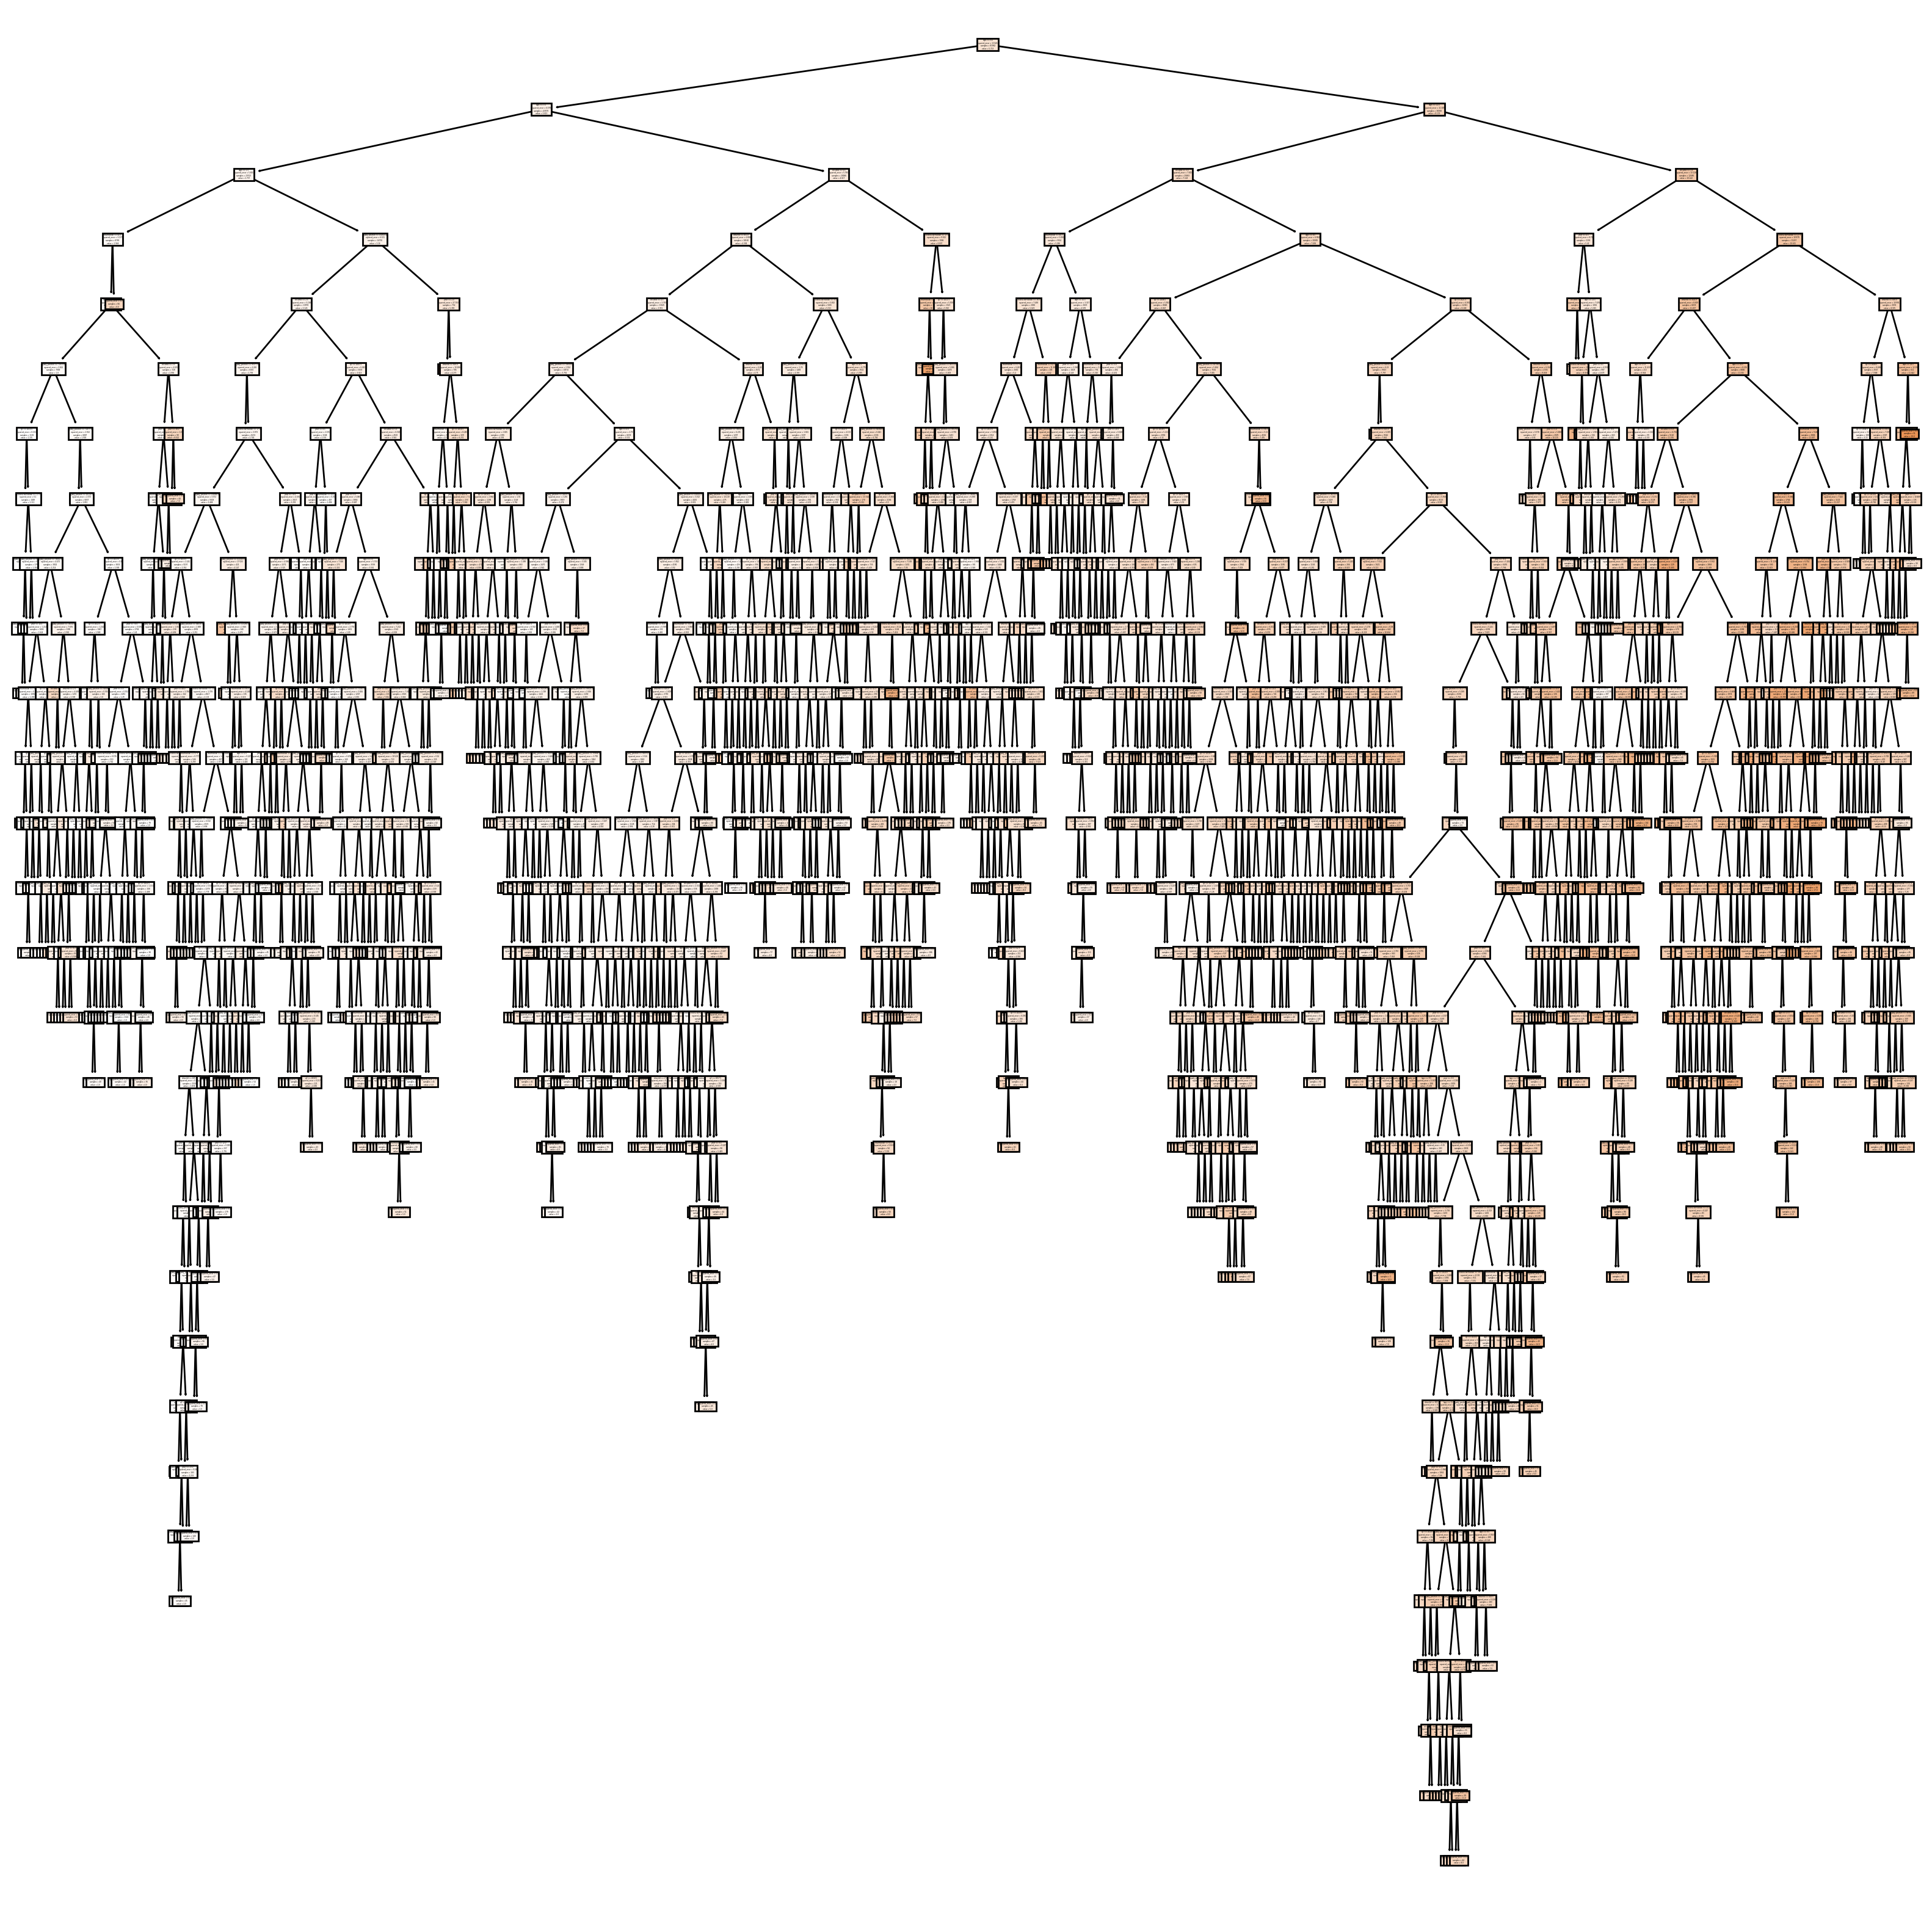

In [66]:
plt.figure ( figsize = (20,20), dpi = 200 )
plot_tree ( dt, feature_names = GrandPrix.columns, filled = True )

In [67]:
plt.show()

In [68]:
y_pred_dt = dt.predict( X_test_scaled )
mse_dt = mean_squared_error( y_test, y_pred_dt )
print( mse_dt )

21.128153823629887


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



In [69]:
dt_r2 = r2_score( y_test, y_pred_dt )
print( dt_r2 )

-0.5164986714597037


###Random Forest

In [70]:
rf = RandomForestRegressor ( random_state = 50 )
rf.fit ( X_train_scaled, y_train )

RandomForestRegressor(random_state=50)

In [71]:
y_pred_rf = rf.predict ( X_test_scaled )
mse_rf =  mean_squared_error ( y_test, y_pred_rf )
print ( mse_rf )

0.4158502269288956


In [72]:
rf_r2 = r2_score ( y_test, y_pred_rf )
print(rf_r2)

0.970151849426684


###Compare

In [73]:
results =  pd.DataFrame({
    'Model': [ 'SVM', 'DT', 'RF' ],
    'MSE': [ mse_svm, mse_dt, mse_rf ],
    'R2': [ svm_r2, dt_r2, rf_r2 ]
 })
results

,Model,MSE,R2
0,SVM,4.389642,0.684928
1,DT,21.128154,-0.516499
2,RF,0.415850,0.970152


In [564]:
print(results)

  Model        MSE        R2
0   SVM   4.389642  0.684928
1    DT  21.128154 -0.516499
2    RF   0.415850  0.970152


In [74]:
figr = px.bar(results, x = 'Model', y = [ 'MSE', 'R2' ], barmode = 'group', title = 'Models Comparation ',
              labels = { 'value': 'Score', 'variable': 'Metrica' }, template = 'plotly_dark' )
figr.show()

##Classicators

###SVM

In [75]:
svm_c = SVC ()
svm_c.fit(X_train_scaled, y_train)

SVC()

In [76]:
svm_pred = svm_c.predict(X_test_scaled)
svm_pred

array([5, 1, 6, ..., 2, 1, 1])

In [77]:
svm_cm = confusion_matrix( y_test, svm_pred )

In [78]:
svm_report = classification_report( y_test, svm_pred )

###Random Forest

In [79]:
rf_c = RandomForestClassifier()
rf_c.fit( X_train_scaled, y_train )

RandomForestClassifier()

In [80]:
rf_pred = rf_c.predict( X_test_scaled )
rf_pred

array([5, 1, 9, ..., 3, 1, 4])

In [81]:
rf_cm = confusion_matrix( y_test, rf_pred )

In [82]:
rf_report = classification_report( y_test, rf_pred )

###KN

In [83]:
knn = KNeighborsClassifier()
knn.fit( X_train_scaled, y_train )

KNeighborsClassifier()

In [84]:
knn_pred = knn.predict( X_test_scaled )
knn_pred

array([5, 1, 9, ..., 3, 1, 4])

In [85]:
knn_cm = confusion_matrix( y_test, knn_pred )

In [86]:
knn_report = classification_report( y_test, knn_pred )

###Compare

In [87]:
print( 'SVM' )
print( svm_report )
print( 'Random Forest' )
print( rf_report )
print( 'KNN' )
print( knn_report )

SVM
              precision    recall  f1-score   support

           1       0.65      0.83      0.73      2594
           2       0.54      0.63      0.58      2235
           3       0.67      0.58      0.62      2160
           4       0.62      0.58      0.60      1998
           5       0.70      0.66      0.68      2078
           6       0.58      0.64      0.60      1811
           7       0.60      0.65      0.62      1611
           8       0.76      0.68      0.72      1467
           9       0.69      0.62      0.65      1087
          10       0.80      0.64      0.71       967
          11       0.87      0.67      0.76       770
          12       0.80      0.72      0.76       554
          13       0.85      0.69      0.76       398
          14       0.77      0.79      0.78       292
          15       1.00      0.79      0.88       256
          16       1.00      1.00      1.00        88
          17       1.00      1.00      1.00        86
          18       1.00

In [635]:
svm_acc = accuracy_score( y_test, svm_pred )
rf_acc = accuracy_score( y_test, rf_pred )
knn_acc = accuracy_score( y_test, knn_pred )

print( f'Accuracy of the SVM: {svm_acc*100:.2f}%' )
print( f'Accuracy of the RFC: {rf_acc*100:.2f}%' )
print( f'Accuracy of the KNN: {knn_acc*100:.2f}%' )

Accuracy of the SVM: 66.57%
Accuracy of the RFC: 100.00%
Accuracy of the KNN: 100.00%


In [88]:
print( 'SVM' )
print( svm_cm )
print( 'Random Forest' )
print( rf_cm )
print( 'KNN' )
print( knn_cm )

SVM
[[2158  290   59   38   11   10   16   12    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 483 1398  159  129   53    0   13    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 272  293 1243  113   99   92   40    8    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 138  185  158 1165  144  101   48   48   11    0    0    0    0    0
     0    0    0    0    0    0]
 [  55  218   92  162 1365   87   50   19   12    9    0    9    0    0
     0    0    0    0    0    0]
 [  73   50   57   98   85 1150  160   61   25   33    0    0    0   19
     0    0    0    0    0    0]
 [  46   82   52   93   82  144 1041   34   37    0    0    0    0    0
     0    0    0    0    0    0]
 [   0   31   13    0   47  121  109  995   69   40   18   14    0   10
     0    0    0    0    0    0]
 [  39    0    0   21   12  128   70   46  670   33   21   26    0   21
     0    0    0    0    0    0]
 [  14    9   14   40   28   36   98   20   31  621

#Chosen Model: Random Forest

In [89]:
mse_rfc =  mean_squared_error ( y_test, rf_pred )
rfc_r2 = r2_score ( y_test, rf_pred )

In [90]:
print('RFR')
print(mse_rf)
print(rf_r2)
print('RFC')
print(mse_rfc)
print(rfc_r2)

RFR
0.4158502269288956
0.970151849426684
RFC
0.0
1.0


In [239]:
from sklearn.pipeline import Pipeline

race_prediction = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators = 11, random_state = 11))
])
race_prediction

Pipeline(steps=[('classifier',
                 RandomForestClassifier(n_estimators=11, random_state=11))])

In [240]:
race_prediction.fit( X, y )

Pipeline(steps=[('classifier',
                 RandomForestClassifier(n_estimators=11, random_state=11))])

In [242]:
result_pred = race_prediction.predict( X_test )
result_pred

array([5, 1, 9, ..., 3, 1, 4])

##Evaluation

In [244]:
rp_acc = accuracy_score( y_test, result_pred )
rp_report = classification_report( y_test, result_pred )
print(rp_report)
print( f'Accuracy of the RFC: {rp_acc*100:.2f}%' )

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2594
           2       1.00      1.00      1.00      2235
           3       1.00      1.00      1.00      2160
           4       1.00      1.00      1.00      1998
           5       1.00      1.00      1.00      2078
           6       1.00      1.00      1.00      1811
           7       1.00      1.00      1.00      1611
           8       1.00      1.00      1.00      1467
           9       1.00      1.00      1.00      1087
          10       1.00      1.00      1.00       967
          11       1.00      1.00      1.00       770
          12       1.00      1.00      1.00       554
          13       1.00      1.00      1.00       398
          14       1.00      1.00      1.00       292
          15       1.00      1.00      1.00       256
          16       1.00      1.00      1.00        88
          17       1.00      1.00      1.00        86
          18       1.00    

##Test

In [264]:
c_name = 'Autodromo Enzo e Dino Ferrari'
d_name = 'Max Verstappen'

In [265]:
d_id = drivers.loc[ drivers[ 'Full_Name' ] == d_name, 'driverId' ].iloc[0]
c_id = circuits.loc[ circuits[ 'circuitName' ] == c_name, 'circuitId' ].reset_index( drop = True ).iloc[0]

d_d = GrandPrix[ ( GrandPrix[ 'driverId' ] == d_id ) & ( GrandPrix[ 'circuitId' ] == c_id ) ].sort_values( by = [ 'year'], ascending = False ).iloc[:1]
d_d

,driverId,finalPosition,laps,qualy_position,q3,year,circuitId,constructorPosition,nationalityId
129785,830,1,63,1,87999,2022,21,1,16


In [266]:
d_inputs = {
      'driverId': d_d['driverId'].iloc[0],
      'laps': np.mean(d_d['laps']),
      'qualy_position': d_d['qualy_position'].iloc[0],
      'q3': d_d['q3'].iloc[0],
      'year': d_d['year'].iloc[0],
      'circuitId': d_d['circuitId'].iloc[0],
      'constructorPosition': d_d['constructorPosition'].iloc[0],
      'nationalityId': d_d['nationalityId'].iloc[0]
  }
d_inputs = pd.DataFrame( [ d_inputs ] )
d_inputs.q3 = d_inputs.q3.astype( int )
d_inputs

,driverId,laps,qualy_position,q3,year,circuitId,constructorPosition,nationalityId
0,830,63.0,1,87999,2022,21,1,16


In [267]:
print( race_prediction.predict( d_inputs ) )
print( race_prediction.predict_proba( d_inputs ))

[1]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


###Oscar Piastri's Case

In [269]:
o_id = drivers.loc[ drivers[ 'Full_Name' ] == "Oscar Piastri", 'driverId' ].iloc[0]
c_id = circuits.loc[ circuits[ 'circuitName' ] == c_name, 'circuitId' ].reset_index( drop = True ).iloc[0]

o_d = GrandPrix[ ( GrandPrix[ 'driverId' ] == o_id ) & ( GrandPrix[ 'circuitId' ] == c_id ) ].sort_values( by = [ 'year'], ascending = False ).iloc[:1]
o_d

,driverId,finalPosition,laps,qualy_position,q3,year,circuitId,constructorPosition,nationalityId


In [281]:
o_d = GrandPrix[ ( GrandPrix[ 'driverId' ] == d_id ) ].sort_values( by = [ 'year'], ascending = False )
c_laps = GrandPrix.loc[ GrandPrix[ 'circuitId' ] == c_id, 'laps' ].reset_index( drop = True ).iloc[0]
c_laps

62

In [287]:
o_d['laps'] = c_laps
o_inputs = {
      'driverId': np.mean(o_d['driverId']).astype(int),
      'laps': np.mean(o_d['laps']).astype(int),
      'qualy_position': np.mean(o_d.qualy_position).astype(int),
      'q3': np.mean(o_d['q3']).astype(int),
      'year': 2023,
      'circuitId': np.mean(o_d['circuitId']).astype(int),
      'constructorPosition': np.mean(o_d['constructorPosition']).astype(int),
      'nationalityId': np.mean(o_d['nationalityId']).astype(int)
  }
o_inputs = pd.DataFrame( [ o_inputs ] )
o_inputs

,driverId,laps,qualy_position,q3,year,circuitId,constructorPosition,nationalityId
0,830,62,4,84120,2023,26,1,16


In [288]:
print( race_prediction.predict( o_inputs ) )
print( race_prediction.predict_proba( o_inputs ))

[3]
[[0.09090909 0.18181818 0.27272727 0.18181818 0.         0.18181818
  0.         0.         0.09090909 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


##Generalize

In [289]:
def prediction( driver_name, circuit_name, grid, year ):
  driver_id = drivers.loc[ drivers[ 'Full_Name' ] == driver_name, 'driverId' ].iloc[0]
  circuit_id = circuits.loc[ circuits[ 'circuitName' ] == circuit_name, 'circuitId' ].reset_index( drop = True ).iloc[0]

  input_data = GrandPrix[ ( GrandPrix[ 'driverId' ] == driver_id ) & ( GrandPrix[ 'circuitId' ] == circuit_id ) ].sort_values( by = [ 'year'], ascending = False ).iloc[:1]

  if input_data.empty:
    input_data = GrandPrix[ ( GrandPrix[ 'driverId' ] == driver_id ) ].sort_values( by = [ 'year'], ascending = True )
    c_laps = GrandPrix.loc[ GrandPrix[ 'circuitId' ] == c_id, 'laps' ].reset_index( drop = True ).iloc[0]
    input_data['laps'] = c_laps

  inputs = {
      'driverId': np.mean(input_data['driverId']).astype(int),
      'laps': np.mean(input_data['laps']).astype(int),
      'qualy_position': grid,
      'q3': np.mean(input_data['q3']).astype(int),
      'year': year,
      'circuitId': np.mean(input_data['circuitId']).astype(int),
      'constructorPosition': np.mean(input_data['constructorPosition']).astype(int),
      'nationalityId': np.mean(input_data['nationalityId']).astype(int)
  }
  inputs = pd.DataFrame( [ inputs ] )
  return race_prediction.predict( inputs ), race_prediction.predict_proba( inputs )

In [293]:
qualys = list( range( 1, 21 ) )
year = 2024

### Test with Verstappen

In [483]:
predict = []
d_name = 'Max Verstappen'

for qualy in qualys:
 pred, prob = prediction( d_name, c_name, qualy, year )
 predict.append({
        'Driver': d_name,
        'Grid': qualy,
        'Year': year,
        'Prediction': pred[0],
        'Probability': np.max( prob )
  })

In [484]:
df_b = pd.DataFrame(predict)
#df_b = df_b.loc[ df_b ['Driver'] == 'Max Verstappen' ]
df_b[ 'Norm_Pred' ] =  ((df_b[ 'Prediction' ] *  df_b[ 'Probability' ]).round()).astype(int)
df_b

,Driver,Grid,Year,Prediction,Probability,Norm_Pred
0,Max Verstappen,1,2024,1,1.000000,1
1,Max Verstappen,2,2024,1,0.545455,1
2,Max Verstappen,3,2024,2,0.545455,1
3,Max Verstappen,4,2024,2,0.363636,1
4,Max Verstappen,5,2024,2,0.454545,1
5,Max Verstappen,6,2024,2,0.454545,1
6,Max Verstappen,7,2024,2,0.363636,1
7,Max Verstappen,8,2024,2,0.363636,1
8,Max Verstappen,9,2024,2,0.363636,1
9,Max Verstappen,10,2024,2,0.363636,1


In [485]:
df_b = pd.DataFrame(predict)
#df_b = df_b.loc[ df_b ['Driver'] == 'Max Verstappen' ]
df_b[ 'Norm_Pred' ] =  df_b[ 'Prediction' ] / df_b[ 'Probability' ]
norm_pred = [{
    'Driver': d_name,
    'Year': 2024,
    'Prediction': np.ceil(df_b.Norm_Pred.mean()),
    'Probability': df_b.Probability.mean(),
}]

norm_pred = pd.DataFrame(norm_pred)
norm_pred

,Driver,Year,Prediction,Probability
0,Max Verstappen,2024,5.0,0.459091


###Test Oscar Piastri's Case

In [488]:
predict = []

for qualy in qualys:
 pred, prob = prediction( "Oscar Piastri", c_name, qualy, year )
 predict.append({
        'Driver': "Oscar Piastri",
        'Grid': qualy,
        'Year': year,
        'Prediction': pred[0],
        'Probability': np.max( prob )
  })

In [489]:
df_b = pd.DataFrame(predict)
df_b[ 'Norm_Pred' ] =  df_b[ 'Prediction' ] / df_b[ 'Probability' ]
norm_pred = [{
    'Driver': 'Oscar Piastri',
    'Year': 2024,
    'Prediction': np.ceil(df_b.Norm_Pred.mean()),
    'Probability': df_b.Probability.mean(),
}]

norm_pred = pd.DataFrame(norm_pred)
norm_pred

,Driver,Year,Prediction,Probability
0,Oscar Piastri,2024,18.0,0.536364


#Try the Model

##Before Qualy

In [499]:
def prediction_without_qualy( driver_name, circuit_name, year ):
  predict = []
  for qualy in qualys:
    pred, prob = prediction( driver_name, c_name, qualy, year )
    predict.append({
         'Driver': driver_name,
         'Grid': qualy,
         'Year': year,
         'Prediction': pred[0],
         'Probability': np.max( prob )
    })
  df_b = pd.DataFrame(predict)
  df_b[ 'Norm_Pred' ] =  df_b[ 'Prediction' ] / df_b[ 'Probability' ]
  norm_pred = {
    'Driver': driver_name,
    'Grand Prix': f'{c_name} {year}',
    'Prediction': np.ceil(df_b.Norm_Pred.mean()),
    'Probability': df_b.Probability.mean(),
  }

  return norm_pred

In [500]:
piastri_pred = prediction_without_qualy( "Oscar Piastri", c_name, year )
piastri_pred

{'Driver': 'Oscar Piastri',
 'Grand Prix': 'Autodromo Enzo e Dino Ferrari 2024',
 'Prediction': 18.0,
 'Probability': 0.5363636363636364}

In [501]:
def full_prediction_not_quali( driver_names, circuit_name, year ):
  predict = []
  for driver_name in driver_names:
    pred = prediction_without_qualy( driver_name, circuit_name, year )
    predict.append( pred )
  norm_pred = pd.DataFrame( predict )
  norm_pred[ 'Prediction' ] =  norm_pred[ 'Prediction' ] * norm_pred[ 'Probability' ]
  norm_pred = norm_pred.drop( columns = [ 'Probability' ] )
  pred = norm_pred.sort_values( by = [ 'Prediction' ], ascending = True ).reset_index( drop = True )
  return pred

In [502]:
race_pred = full_prediction_not_quali( a_drivers, c_name, year )
race_pred

,Driver,Grand Prix,Prediction
0,Max Verstappen,Autodromo Enzo e Dino Ferrari 2024,2.295455
1,Lewis Hamilton,Autodromo Enzo e Dino Ferrari 2024,2.536364
2,Sergio Pérez,Autodromo Enzo e Dino Ferrari 2024,4.145455
3,George Russell,Autodromo Enzo e Dino Ferrari 2024,5.250000
4,Carlos Sainz,Autodromo Enzo e Dino Ferrari 2024,5.950000
5,Charles Leclerc,Autodromo Enzo e Dino Ferrari 2024,6.181818
6,Fernando Alonso,Autodromo Enzo e Dino Ferrari 2024,6.709091
7,Alexander Albon,Autodromo Enzo e Dino Ferrari 2024,6.795455
8,Lando Norris,Autodromo Enzo e Dino Ferrari 2024,7.200000
9,Guanyu Zhou,Autodromo Enzo e Dino Ferrari 2024,8.272727


In [637]:
pd.DataFrame.to_csv( race_pred, 'race_pred.csv', index = False )

##After Qualy

In [370]:
#Change the qualy position manually
drivers_q = [ ('Max Verstappen',    1)
            , ('Sergio Pérez',      2)
            , ('Lewis Hamilton',    3)
            , ('Fernando Alonso',   4)
            , ('Charles Leclerc',   5)
            , ('Lando Norris',      6)
            , ('Carlos Sainz',      7)
            , ('George Russell',    8)
            , ('Oscar Piastri',     9)
            , ('Lance Stroll',     10)
            , ('Pierre Gasly',     11)
            , ('Esteban Ocon',     12)
            , ('Alexander Albon',  13)
            , ('Yuki Tsunoda',     14)
            , ('Valtteri Bottas',  15)
            , ('Nico Hülkenberg',  16)
            , ('Daniel Ricciardo', 17)
            , ('Guanyu Zhou',      18)
            , ('Kevin Magnussen',  19)
            , ("Logan Sargeant",   20)
            ]
drivers_q = pd.DataFrame(drivers_q).rename(columns={0:'Driver', 1:'Grid'})
drivers_q

,Driver,Grid
0,Max Verstappen,1
1,Sergio Pérez,2
2,Lewis Hamilton,3
3,Fernando Alonso,4
4,Charles Leclerc,5
5,Lando Norris,6
6,Carlos Sainz,7
7,George Russell,8
8,Oscar Piastri,9
9,Lance Stroll,10


In [505]:
def prediction_with_qualy( driver_name, circuit_name, year, qualy ):
  predict = []
  pred, prob = prediction( driver_name, c_name, qualy, year )
  predict.append({
         'Driver': driver_name,
         'Grid': qualy,
         'Year': year,
         'Prediction': pred[0],
         'Probability': np.max( prob )
  })
  df_b = pd.DataFrame(predict)
  df_b[ 'Norm_Pred' ] =  df_b[ 'Prediction' ] / df_b[ 'Probability' ]
  norm_pred = {
    'Driver': driver_name,
    'Grand Prix': f'{c_name} {year}',
    'Prediction': np.ceil(df_b.Norm_Pred.mean()),
    'Probability': df_b.Probability.mean(),
  }

  return norm_pred

In [506]:
piastri_pred_q = prediction_with_qualy( "Oscar Piastri", c_name, year, 9 )
piastri_pred_q

{'Driver': 'Oscar Piastri',
 'Grand Prix': 'Autodromo Enzo e Dino Ferrari 2024',
 'Prediction': 14.0,
 'Probability': 0.8181818181818182}

In [510]:
def full_prediction_with_quali( driver_quali, circuit_name, year ):
  predict = []
  for i in list(range(0,20)):
    pred = prediction_with_qualy( driver_quali.Driver[i], circuit_name, year, driver_quali.Grid[i] )
    predict.append( pred )
  norm_pred = pd.DataFrame( predict )
  norm_pred[ 'Prediction' ] =  norm_pred[ 'Prediction' ] * norm_pred[ 'Probability' ]
  norm_pred = norm_pred.drop( columns = [ 'Probability' ] )
  pred = norm_pred.sort_values( by = [ 'Prediction' ], ascending = True ).reset_index( drop = True )
  return pred

In [511]:
race_pred_q = full_prediction_with_quali( drivers_q, c_name, year )
race_pred_q

,Driver,Grand Prix,Prediction
0,Max Verstappen,Autodromo Enzo e Dino Ferrari 2024,1.000000
1,Lewis Hamilton,Autodromo Enzo e Dino Ferrari 2024,1.090909
2,Sergio Pérez,Autodromo Enzo e Dino Ferrari 2024,3.181818
3,Fernando Alonso,Autodromo Enzo e Dino Ferrari 2024,3.272727
4,Lando Norris,Autodromo Enzo e Dino Ferrari 2024,4.000000
5,George Russell,Autodromo Enzo e Dino Ferrari 2024,4.090909
6,Carlos Sainz,Autodromo Enzo e Dino Ferrari 2024,5.000000
7,Alexander Albon,Autodromo Enzo e Dino Ferrari 2024,5.181818
8,Charles Leclerc,Autodromo Enzo e Dino Ferrari 2024,7.090909
9,Guanyu Zhou,Autodromo Enzo e Dino Ferrari 2024,7.090909


In [638]:
pd.DataFrame.to_csv( race_pred_q, 'race_pred_q.csv', index = False )